In [ ]:
# # prompt: create an LSTM using pytorch for predicting cryptocurrency price from a data set with the following row names ID;Date;Date (Unix);Pool;Pool Tokens;Liquidity;Sqrt Price;Token0 Price;Token1 Price;Tick;Fee Growth Global 0 X128;Fee Growth Global 1 X128;TVL USD;Volume Token 0;Volume Token 1;Volume USD;Fees USD;TX Count;Open;High;Low;Close

# import torch
# import torch.nn as nn
# from torch.utils.data import Dataset, DataLoader
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Create a dataset class
# class CryptoDataset(Dataset):
#   def __init__(self, csv_file, seq_len):
#     self.data = pd.read_csv(csv_file, delimiter=';')
#     self.seq_len = seq_len
#     self.scaler = MinMaxScaler(feature_range=(0, 1))
#     self.data = self.data.dropna()
#     self.data = self.data.drop(['ID','Pool','Pool Tokens', 'Date (Unix)', 'Liquidity', 'Sqrt Price', 'Token0 Price', 'Token1 Price', 'Tick', 'Fee Growth Global 0 X128', 'Fee Growth Global 1 X128', 'TVL USD', 'Volume Token 0', 'Volume Token 1', 'Volume USD', 'Fees USD', 'TX Count', 'Open', 'High', 'Low'], axis=1)
#     self.data = self.data.set_index('Date')
#     self.data = self.scaler.fit_transform(self.data)

#   def __len__(self):
#     return len(self.data) - self.seq_len

#   def __getitem__(self, idx):
#     x = self.data[idx:idx + self.seq_len, :]
#     y = self.data[idx + self.seq_len, -1]
#     return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# # Create the dataloader
# train_dataset = CryptoDataset('/content/WBTC_WETH.csv', 10)
# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=False)

# # Create the model
# model = nn.LSTM(input_size=10, hidden_size=128, num_layers=2, batch_first=True)
# model.linear = nn.Linear(128, 1)

# # Define the loss function and optimizer
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Train the model
# for epoch in range(100):
#   for batch_idx, (x, y) in enumerate(train_loader):
#     # Get the predictions
#     print(x)
#     y_pred = model(x)

#     # Calculate the loss
#     # print(y)
#     print(y_pred)
#     loss = criterion(y_pred, y.unsqueeze(1))

#     # Backpropagate the loss
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#   # Print the loss
#   print('Epoch: {} Loss: {}'.format(epoch, loss.item()))

# # Save the model
# torch.save(model, 'crypto_model.pt')


In [ ]:

# import torch
# import torch.nn as nn
# import numpy as np

# class LSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, num_layers=1):
#         super().__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
#         self.linear = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         h_0 = torch.zeros(x.size(0), self.lstm.hidden_size)
#         c_0 = torch.zeros(x.size(0), self.lstm.hidden_size)
#         out, (h_n, c_n) = self.lstm(x, (h_0, c_0))
#         out = self.linear(out[:, -1, :])
#         return out


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/WBTC_WETH.csv", delimiter =';', thousands=',')

df['Target0'] = df['Token0 Price']
df['Target0'] = df['Target0'].shift(-1)

df['Target1'] = df['Token1 Price']
df['Target1'] = df['Target1'].shift(-1)

df = df.drop(columns=['ID', 'Pool', 'Date (Unix)',  'Pool Tokens', 'Sqrt Price', 'Fee Growth Global 0 X128', 'Fee Growth Global 1 X128'])
df.set_index('Date', inplace=True)
df.head(5)

,Liquidity,Token0 Price,Token1 Price,Tick,TVL USD,Volume Token 0,Volume Token 1,Volume USD,Fees USD,TX Count,Open,High,Low,Close,Target0,Target1
Date,,,,,,,,,,,,,,,,
"5/4/2021, 8:00:00 AM",34777181970750,0.062183,16.081657,258048,0.000000e+00,0.001864,0.030000,0.000000e+00,0.000000,10,0.000000,0.062362,0.000000,0.000000,0.061452,16.272905
"5/5/2021, 8:00:00 AM",58107907112361704,0.061452,16.272905,258166,8.760155e+06,8.632843,142.066275,4.925324e+05,1477.597347,93,0.062183,0.062183,0.059630,0.062183,0.062084,16.107086
"5/6/2021, 8:00:00 AM",103357834300594400,0.062084,16.107086,258064,3.459820e+07,132.057539,2145.953858,7.507954e+06,22523.861295,385,0.061448,0.062648,0.059782,0.061448,0.060522,16.522884
"5/7/2021, 8:00:00 AM",123663143553149390,0.060522,16.522884,258318,4.508025e+07,191.918465,3141.886951,1.097052e+07,32911.554663,317,0.062084,0.062084,0.060276,0.062084,0.066285,15.086341
"5/8/2021, 8:00:00 AM",140576450677868030,0.066285,15.086341,257409,5.307294e+07,396.720409,6318.655938,2.327335e+07,69820.047586,238,0.060522,0.066670,0.060101,0.060522,0.067151,14.891741


In [4]:
df.to_csv('/content/cleaned_WBTC_WETH.csv')

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(df)
print(data_set_scaled)

[[0.         0.31844973 0.55185201 ... 0.         0.29878291 0.57452855]
 [0.00665202 0.29878291 0.57452855 ... 0.71017161 0.31580784 0.55486719]
 [0.0118352  0.31580784 0.55486719 ... 0.70178627 0.27376287 0.60416886]
 ...
 [0.08251262 0.06910597 0.88572066 ... 0.58314971 0.06386928 0.89399069]
 [0.0966285  0.06386928 0.89399069 ... 0.60435425 0.05926798 0.90130765]
 [0.09648138 0.05926798 0.90130765 ... 0.60213189        nan        nan]]


In [16]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 5
print(data_set_scaled.shape[0])
for j in range(14):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X = np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# print(X)
print(X.shape)
# print(y)
print(y.shape)

965
(960, 5, 14)
(960, 1)


In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 14), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(2, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

In [25]:
inputs

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_layer')>

In [20]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

6/6 [==============================] - 0s 3ms/step
[0.44114426] [0.45997913]
[0.43701395] [0.45899915]
[0.44239298] [0.47557934]
[0.43922803] [0.51753448]
[0.454394] [0.53488691]
[0.48543394] [0.53522807]
[0.5073726] [0.56633383]
[0.51172537] [0.56856994]
[0.5357977] [0.55076043]
[0.5282686] [0.56918255]


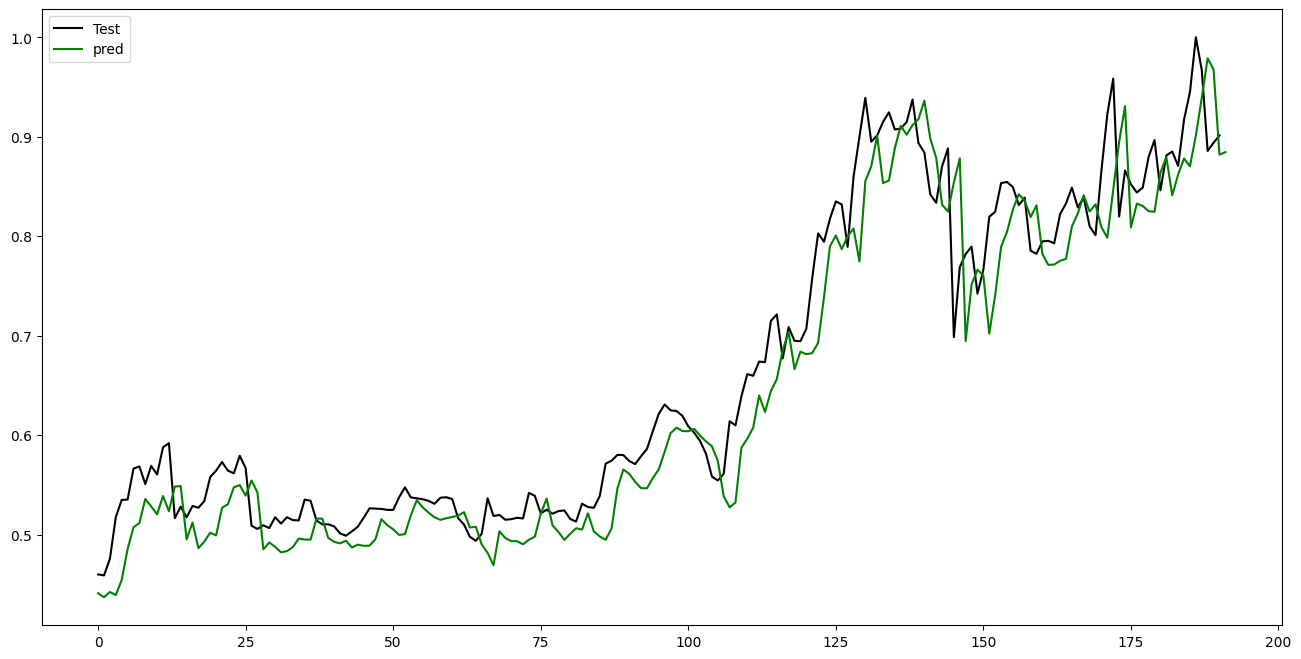

In [21]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

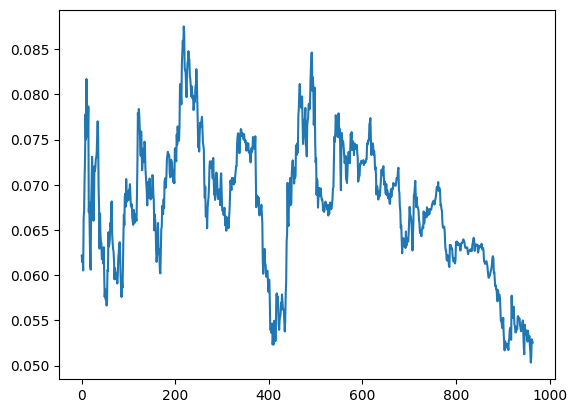

In [14]:
import matplotlib.pyplot as plt
timeseries0 = df[["Token0 Price"]].values.astype('float32')

plt.plot(timeseries0)
plt.show()

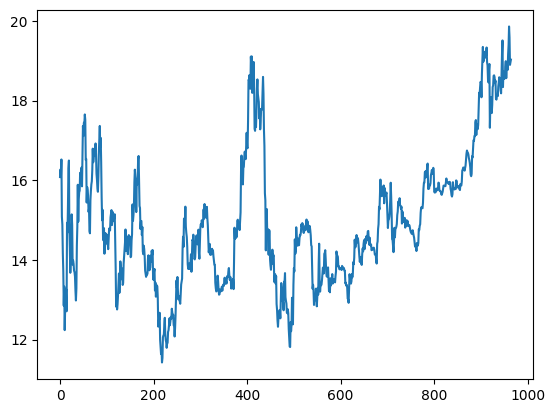

In [ ]:
timeseries1 = df[["Token1 Price"]].values.astype('float32')

plt.plot(timeseries1)
plt.show()

In [ ]:

# # Scale the data
# X_train, X_test, y_train, y_test = train_test_split(df.drop('Close', axis=1), df['Close'], test_size=0.25)
# train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# # scaler = StandardScaler()
# # X_train = scaler.fit_transform(X_train)
# # X_test = scaler.transform(X_test)

# # Create the LSTM model
# model = nn.LSTM(input_size=8, hidden_size=128, num_layers=2, batch_first=True)
# model.linear = nn.Linear(128, 1)
# # model = LSTM(31, 128, 1)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# for epoch in range(100):
#   for batch_idx, (x, y) in enumerate(train_loader):
#     # Get the predictions
#     y_pred = model(x)

#     # Calculate the loss
#     loss = criterion(y_pred, y.unsqueeze(1))

#     # Backpropagate the loss
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#   # Print the loss
#   print('Epoch: {} Loss: {}'.format(epoch, loss.item()))

# # Save the model
# torch.save(model, 'crypto_model.pt')

# # Evaluate the model
# model.evaluate(X_test, y_test)

# # Make predictions
# predictions = model.predict(X_test)

# # Plot the predictions
# plt.plot(y_test, label='Actual')
# plt.plot(predictions, label='Predicted')
# plt.legend()
# plt.show()


NameError: ignored